<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Final_Project_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Final Project: Supervised Learning Pipeline
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC

In [29]:
# Loading Datasets
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (2).csv
Saving titanic.csv to titanic (1).csv


In [30]:
housing = pd.read_csv("housing.csv")
titanic = pd.read_csv("titanic.csv")

In [31]:
# Exploratory Data Analysis (EDA)
# California Housing
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


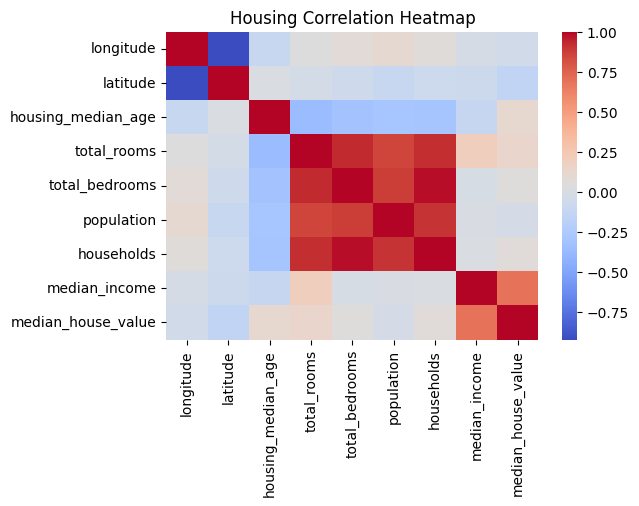

In [34]:
plt.figure(figsize=(6,4))

numeric_housing = housing.select_dtypes(include=np.number)
sns.heatmap(numeric_housing.corr(), cmap="coolwarm")

plt.title("Housing Correlation Heatmap")
plt.show()

In [35]:
# Titanic Dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


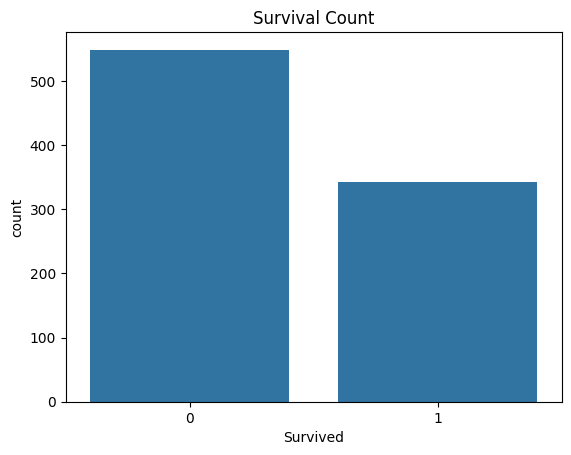

In [37]:
sns.countplot(x="Survived", data=titanic)
plt.title("Survival Count")
plt.show()

In [38]:
# Data Cleaning & Preprocessing
# California Housing - Regression
# Drop missing values
housing = housing.dropna()

# One-hot encode categorical column
housing = pd.get_dummies(housing, columns=["ocean_proximity"], drop_first=True)

# Splitting features and target
X_housing = housing.drop("median_house_value", axis=1)
y_housing = housing["median_house_value"]

# Scaling features
scaler = StandardScaler()
X_housing = scaler.fit_transform(X_housing)

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

In [39]:
# Titanic - Classification
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

titanic = pd.get_dummies(titanic, drop_first=True)

X_titanic = titanic.drop("Survived", axis=1)
y_titanic = titanic["Survived"]

scaler = StandardScaler()
X_titanic = scaler.fit_transform(X_titanic)

Xt_train, Xt_test, yt_train, yt_test = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42
)

/tmp/ipython-input-2518857530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
/tmp/ipython-input-2518857530.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [40]:
# Regression Models - California Housing
# Linear Regression
lr = LinearRegression()
lr.fit(Xh_train, yh_train)
pred_lr = lr.predict(Xh_test)

print("RMSE:", np.sqrt(mean_squared_error(yh_test, pred_lr)))
print("R2:", r2_score(yh_test, pred_lr))

RMSE: 69297.7166911303
R2: 0.6488402154431994


In [41]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(Xh_train, yh_train)
pred_rf = rf.predict(Xh_test)

print("RMSE:", np.sqrt(mean_squared_error(yh_test, pred_rf)))
print("R2:", r2_score(yh_test, pred_rf))

RMSE: 49042.602492307065
R2: 0.8241210191771516


In [42]:
# Classification Models - Titanic
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xt_train, yt_train)
pred_log = log_reg.predict(Xt_test)

print(classification_report(yt_test, pred_log))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [44]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(Xt_train, yt_train)
pred_rf = rf_clf.predict(Xt_test)

print(classification_report(yt_test, pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [45]:
# Hyperparameter Tuning
param_grid = {
    "n_estimators": [30, 50],
    "max_depth": [None, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1
)

grid.fit(Xt_train, yt_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


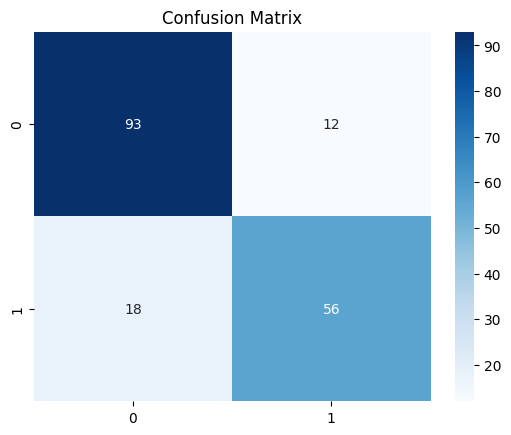

In [46]:
# Model Evaluation Visuals
# Confusion Matrix
cm = confusion_matrix(yt_test, pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

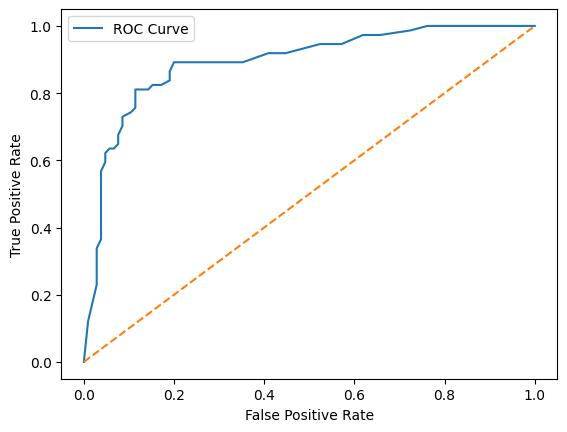

In [47]:
# ROC Curve
y_prob = rf_clf.predict_proba(Xt_test)[:,1]
fpr, tpr, _ = roc_curve(yt_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


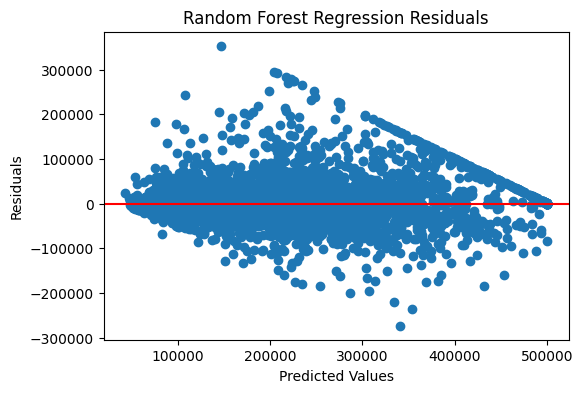

In [48]:
# Prediction & Analysis
# Regression Residuals
# Prediction & Analysis - Regression Residuals: California Housing

# Predicting using the regression model
pred_rf_reg = rf.predict(Xh_test)

# Calculating residuals
residuals = yh_test - pred_rf_reg

# Plotting residuals
plt.figure(figsize=(6,4))
plt.scatter(pred_rf_reg, residuals)
plt.axhline(0, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Random Forest Regression Residuals")
plt.show()
